<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [27]:
# type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import scipy.stats as stats

#### Read the data

Load the csv file and print the first five observations.

In [28]:
# type your code here
df = pd.read_csv("bank_churn.csv")
df.head()

,CreditScore,Geography,Gender,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard,Closed_Acc
0,619,France,Female,42,2,0.00,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,0
2,502,France,Female,42,8,159660.80,3,1,1
3,699,France,Female,39,1,0.00,2,0,0
4,850,Spain,Female,43,2,125510.82,1,1,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CreditScore       9920 non-null   int64  
 1   Geography         9920 non-null   object 
 2   Gender            9920 non-null   object 
 3   Age               9920 non-null   int64  
 4   NumOfYrsWithBank  9920 non-null   int64  
 5   Balance           9920 non-null   float64
 6   NumOfProducts     9920 non-null   int64  
 7   HasCrCard         9920 non-null   int64  
 8   Closed_Acc        9920 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 697.6+ KB


In [30]:
df["Geography"].value_counts()

France     4972
Germany    2491
Spain      2457
Name: Geography, dtype: int64

In [31]:
df["NumOfProducts"].value_counts()

1    5043
2    4556
3     262
4      59
Name: NumOfProducts, dtype: int64

In [32]:
df["HasCrCard"].value_counts()

1    7002
0    2918
Name: HasCrCard, dtype: int64

In [33]:
df.isnull().sum()

CreditScore         0
Geography           0
Gender              0
Age                 0
NumOfYrsWithBank    0
Balance             0
NumOfProducts       0
HasCrCard           0
Closed_Acc          0
dtype: int64

Our objective is to predict whether the customer has closed the bank account or not.

**The data definition is as follows:** <br>

**CreditScore**: Credit score of the customer 

**Geography**: Resident country of the customer

**Gender**: Gender of the customer

**Age**: Age of the customer

**NumOfYrsWithBank**: Years for which the customer has been with the bank

**Balance**: Bank balance of the customer in Euro

**NumOfProducts**: Number of bank facilities for which customer has opted

**HasCrCard**: Whether the customer has credit card or not (1 = Yes, 0 = No)

**Closed_Acc**: Whether the customer has closed the bank account or not (1 = Yes, 0 = No) (target/dependent variable)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is the target variable imbalanced? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
# type your code here
df["Closed_Acc"].value_counts(normalize=True)*100

# We can say that the target variable is balanced.

0    79.616935
1    20.383065
Name: Closed_Acc, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full logistic model and calculate the odds for each variable (consider the probability  threshold as 0.25)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
# type your code here
df_num = df.select_dtypes(include = [np.number]).drop("Closed_Acc"  ,axis = 1)

df_cat = df.select_dtypes(include = "object")

df_dummy = pd.get_dummies(df_cat , drop_first=True)

df_full = pd.concat([df_num , df_dummy] , axis = 1)

X = df_full

X = sm.add_constant(X)

y = df["Closed_Acc"]

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state=10)

model_full = sm.Logit(y_train , X_train).fit()

print(model_full.summary())

Optimization terminated successfully.
         Current function value: 0.441001
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Closed_Acc   No. Observations:                 7936
Model:                          Logit   Df Residuals:                     7926
Method:                           MLE   Df Model:                            9
Date:                Wed, 01 Dec 2021   Pseudo R-squ.:                  0.1259
Time:                        18:32:05   Log-Likelihood:                -3499.8
converged:                       True   LL-Null:                       -4004.0
Covariance Type:            nonrobust   LLR p-value:                2.711e-211
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.0161      0.269    -14.907      0.000      -4.544      -3.488
CreditSc

In [36]:
odds = np.exp(model_full.params)

df_odds = pd.DataFrame(odds , columns = ["odds"])
df_odds

,odds
const,0.018022
CreditScore,0.999683
Age,1.073698
NumOfYrsWithBank,0.993663
Balance,1.000002
NumOfProducts,0.902667
HasCrCard,0.989693
Geography_Germany,2.283200
Geography_Spain,1.000472
Gender_Male,0.582836


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Calculate the Specificity and Sensitivity from the confusion matrix of the full model (consider the probability threshold as 0.25)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [37]:
y_predict_prob = model_full.predict(X_test)
y_pred = [0 if x<0.25 else 1 for x in y_predict_prob]

In [38]:
# type your code here
from sklearn.metrics import confusion_matrix

tn, fp , fn , tp = confusion_matrix(y_test , y_pred).ravel()

In [39]:
print("Specificity: ", tn/(tn+fp))
print("Sensitivity: ",tp/(tp+fn))

Specificity:  0.8073744437380801
Sensitivity:  0.5669099756690997


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a logistic model on the 6 features obtained by RFE and plot the ROC curve 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
# type your code here
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

est = LogisticRegression()

select = RFE(estimator=est , n_features_to_select=6)
select.fit(X_train , y_train)

C:\Users\juhib\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\juhib\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RFE(estimator=LogisticRegression(), n_features_to_select=6)

In [41]:
select.support_

array([ True, False,  True, False, False,  True,  True,  True, False,
        True])

In [42]:
df_features = pd.DataFrame(select.support_ , index = X_train.columns)
df_features[df_features[0] == True]

,0
const,True
Age,True
NumOfProducts,True
HasCrCard,True
Geography_Germany,True
Gender_Male,True


In [43]:
X = df_full[["Age" , "NumOfProducts" ,"HasCrCard" ,"Geography_Germany" , "Gender_Male"]]

X = sm.add_constant(X)

y = df["Closed_Acc"]

X_train_sig , X_test_sig , y_train_sig , y_test_sig = train_test_split(X , y , test_size = 0.2 , random_state=10)

model_sig = sm.Logit(y_train_sig , X_train_sig).fit()
print(model_sig.summary())

Optimization terminated successfully.
         Current function value: 0.441977
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Closed_Acc   No. Observations:                 7936
Model:                          Logit   Df Residuals:                     7930
Method:                           MLE   Df Model:                            5
Date:                Wed, 01 Dec 2021   Pseudo R-squ.:                  0.1240
Time:                        18:32:06   Log-Likelihood:                -3507.5
converged:                       True   LL-Null:                       -4004.0
Covariance Type:            nonrobust   LLR p-value:                2.106e-212
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.0225      0.158    -25.403      0.000      -4.333      -3.712
Age     

Text(0.02, 0.9, "('AUC Score:', 0.7562)")

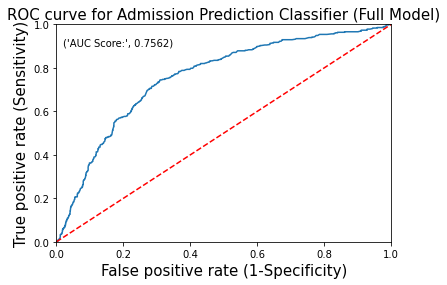

In [44]:
from sklearn.metrics import roc_curve , roc_auc_score

y_pred_sig = model_sig.predict(X_test_sig)

fpr , tpr , threshold = roc_curve(y_test_sig , y_pred_sig)

plt.plot(fpr, tpr)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test_sig, y_pred_sig),4)))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Obtain the optimal value of cut-off probability for the full model using the Youden's index 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
# type your code here
y_pred = model_full.predict(X_test)

fpr , tpr , threshold = roc_curve(y_test , y_pred)

youdens_table = pd.DataFrame({"TPR":tpr ,"FPR":fpr , "Threshold":threshold})

youdens_table["Difference"] = youdens_table["TPR"] - youdens_table["FPR"]

youdens_table = youdens_table.sort_values('Difference' , ascending=False).reset_index(drop = True)

youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.737226,0.301971,0.188143,0.435256
1,0.732360,0.298792,0.190519,0.433568
2,0.766423,0.334393,0.178917,0.432030
3,0.761557,0.330579,0.179915,0.430979
4,0.763990,0.333121,0.179161,0.430869


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Consider the cut-off probability obtained from Youden's index for the full model and calculate the following measures:<br>
                    a. f-1 score <br>
                    b. Accuracy<br>
                    c. Kappa Score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
# type your code here
y_pred_prob = model_full.predict(X_test)

y_pred = [0 if x < 0.188143 else 1 for x in y_pred_prob]

In [47]:
from sklearn.metrics import f1_score , accuracy_score , cohen_kappa_score

print("F1 Score: ",f1_score(y_test , y_pred))
print("Accuracy: ",accuracy_score(y_test , y_pred))
print("Kappa Score: ",cohen_kappa_score(y_test , y_pred))

F1 Score:  0.5084175084175084
Accuracy:  0.7056451612903226
Kappa Score:  0.32569554291514047


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Identify the variables involved in multicollinearity 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

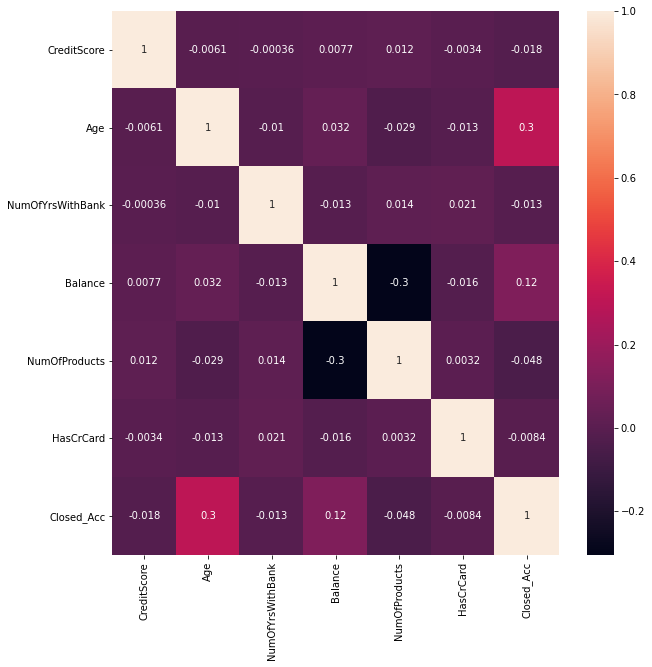

In [48]:
# type your code here
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() , annot = True)

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

df_num = df.select_dtypes(include=[np.number]).drop("Closed_Acc" , axis = 1)

vif["significant"] = df_num.columns

vif["vif"] = [variance_inflation_factor(df_num.values , i) for i in range(df_num.shape[1])]
vif

,significant,vif
0,CreditScore,19.674404
1,Age,12.585069
2,NumOfYrsWithBank,3.851630
3,Balance,2.620344
4,NumOfProducts,7.665322
5,HasCrCard,3.289933


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a logistic regression model using the categorical variables and the variables obtained after calculating VIF. Also, plot the ROC curve and compute the AUC score (consider the cut-off probability as 0.6)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [50]:
# type your code here
df_vif = df[["NumOfYrsWithBank" , "Balance" , "HasCrCard" , "NumOfProducts"]]

df_logit = pd.concat([df_dummy , df_vif] , axis = 1)

X = df_logit

X = sm.add_constant(X)

y = df["Closed_Acc"]

X_train_logit , X_test_logit  , y_train_logit  , y_test_logit = train_test_split(X , y , test_size = 0.2 , random_state=10)

model_logit = sm.Logit(y_train_logit , X_train_logit).fit()
print(model_logit.summary())

Optimization terminated successfully.
         Current function value: 0.482961
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Closed_Acc   No. Observations:                 7936
Model:                          Logit   Df Residuals:                     7928
Method:                           MLE   Df Model:                            7
Date:                Wed, 01 Dec 2021   Pseudo R-squ.:                 0.04275
Time:                        18:32:08   Log-Likelihood:                -3832.8
converged:                       True   LL-Null:                       -4004.0
Covariance Type:            nonrobust   LLR p-value:                 5.275e-70
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2390      0.125     -9.887      0.000      -1.485      -0.993
Geograph

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Consider the costs of false negatives and false positives as 2 and 0.5 respectively to obtain the optimal cut-off probability for which the total cost will be minimum
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [51]:
# type your code here
# define a function to calculate the total_cost for a cut-off value
# pass the actual values of y, predicted probabilities of y, cost for FN and FP
def calculate_total_cost(actual_value, predicted_value, cost_FN, cost_FP):

    # pass the actual and predicted values to calculate the confusion matrix
    cm = confusion_matrix(actual_value, predicted_value)           
    
    # create an array of the confusion matrix
    cm_array = np.array(cm)
    
    # return the total_cost
    return cm_array[1,0] * cost_FN + cm_array[0,1] * cost_FP

# create an empty dataframe to store the cost for different probability cut-offs
df_total_cost = pd.DataFrame(columns = ['cut-off', 'total_cost'])

# initialize i to '0' corresponding to the 1st row in the dataframe
i = 0

# use for loop to calculate 'total_cost' for each cut-off probability value
# call the function 'calculate_total_cost' to calculate the cost
# pass the actual y-values
# calculate the predicted y-values from 'y_pred_prob' for the cut-off probability value
# assign the costs 3.5 and 2 to False Negatives and False Positives respectively
# add the obtained 'cut_off' and 'total_cost' at the ith index of the dataframe
for cut_off in range(10, 100):
    total_cost = calculate_total_cost(y_test,  y_pred_prob.map(lambda x: 1 if x > (cut_off/100) else 0), 2, 0.5) 
    df_total_cost.loc[i] = [(cut_off/100), total_cost] 
    
    # increment the value of 'i' for each row index in the dataframe 'df_total_cost'
    i += 1

# sort the dataframe based on the 'total_cost' in the ascending order
# print the first ten rows in the dataframe
df_total_cost.sort_values('total_cost', ascending = True).head(10)

,cut-off,total_cost
9,0.19,455.5
8,0.18,460.0
7,0.17,462.0
10,0.20,465.0
6,0.16,478.0
12,0.22,479.5
5,0.15,482.5
11,0.21,484.5
13,0.23,488.5
4,0.14,497.5


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full logistic model using the optimal cut-off probability obtained in Q9. Also, plot the confusion matrix and ROC curve along with the AUC score  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

(7936, 10) (7936,)
(1984, 10) (1984,)
Optimization terminated successfully.
         Current function value: 0.441001
         Iterations 6


Text(0.02, 0.9, "('AUC Score:', 0.7607)")

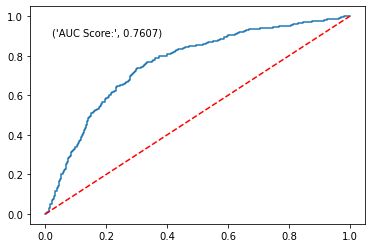

In [52]:
# type your code here
import statsmodels.api as sm
num=df.select_dtypes(include=np.number).drop('Closed_Acc',axis=1)
cat=df.select_dtypes(include='object')
dum=pd.get_dummies(cat,drop_first=True)
X=pd.concat([num,dum],axis=1)
X=sm.add_constant(X)
y=df.Closed_Acc

X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=10, test_size=0.2 )

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

model=sm.Logit(y_train, X_train).fit()
model.summary()

y_pred_prob=model.predict(X_test)
y_pred=[0 if i<0.19 else 1 for i in y_pred_prob]



fpr , tpr , thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr,tpr)
plt.plot([0,1],'r--')
plt.text(x=0.02,y=0.9,  s = ('AUC Score:', round(roc_auc_score(y_test, y_pred_prob),4)))